In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import os
import sys
import warnings
warnings.filterwarnings('ignore')
#!{sys.executable} -m pip install opencv-python

import time
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

import scipy
from PIL import Image
from scipy import ndimage

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV, validation_curve 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import make_pipeline
#from tensorflow.keras import get_default_graph

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np

# This code has been tested with TensorFlow 1.6
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(123)

Using TensorFlow backend.


In [2]:
#define data path
test_folder = '../../data/split/test'
train_folder = '../../data/split/train'
val_folder = '../../data/split/validation'

In [27]:
batch_size = 1000

In [86]:
# Prep data for processing
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, shuffle=True,
        target_size=(256,256), batch_size = batch_size) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, shuffle=True,
        target_size=(256,256), batch_size = batch_size)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, shuffle=True,
        target_size=(256,256), batch_size=batch_size)

Found 68 images belonging to 11 classes.
Found 261 images belonging to 11 classes.
Found 870 images belonging to 11 classes.


In [87]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [88]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [89]:
train_y = np.reshape(train_labels[:,0], (870,1))
test_y = np.reshape(test_labels[:,0], (68,1))
val_y = np.reshape(val_labels[:,0], (261,1))

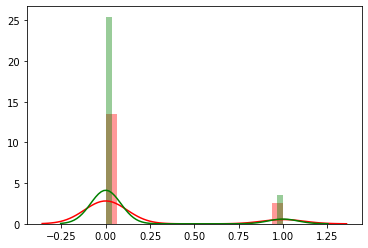

In [90]:
sns.distplot(val_y, color='red')
sns.distplot(train_y, color='green')

# CNN

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(1024, (3, 3), activation='relu',input_shape=(256 ,256,  3)))
model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.05))  

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
#model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.05))  

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
#model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.0025)) 

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
#model.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.0025)) 

#model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(11, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer='adam',
              metrics=['acc'])
model.summary()

history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_split= 0.1,
                    #validation_data=(val_images, val_y)
                    verbose=1)

results_train = model.evaluate(train_images, train_labels)
results_test = model.evaluate(val_images, val_labels)

results_train

results_test

#model.predict_classes(val_images)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 254, 254, 1024)    28672     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 127, 127, 1024)    0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 127, 127, 512)     4719104   
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 63, 63, 512)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 63, 63, 256)       1179904   
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 31, 31, 64)      

In [63]:
model.save('modelvan{}.h5'.format())

In [49]:
model.predict_classes(test_labels)

ValueError: Error when checking input: expected conv2d_47_input to have 4 dimensions, but got array with shape (68, 11)